In [24]:
import os, numpy as np, random
from matplotlib import pyplot as plt
from scipy.stats import zscore as zs

In [44]:
directory = "../smart_data/singular_specs"
options = list(os.listdir(directory))
samples = random.sample(options, 9)
spectra = [(s, np.load(f"{directory}/{s}")[:2000]) for s in samples]
spectra_true_zscore = [(s, zs(np.load(f"{directory}/{s}")[:2000])) for s in samples]
spectra_zscore = []
for s in samples:
    spec = np.load(f"{directory}/{s}")
    nonzero = spec[spec != 0]
    m, std = np.mean(nonzero), np.std(nonzero)
    nonzero = (spec[:2000] - m) / std
    spectra_zscore.append((s, nonzero))

ipykernel_launcher:11: RuntimeWarning: divide by zero encountered in true_divide
ipykernel_launcher:11: RuntimeWarning: invalid value encountered in true_divide


In [45]:
def plot(specs, title=""):
    f = plt.figure(figsize=(25, 15))
    if len(title) > 0: f.suptitle(title)
    for i in range(9):
        ax = f.add_subplot(3, 3, i + 1)
        ax.plot(specs[i][1])
        ax.set_title(specs[i][0][:specs[i][0].index(".")])
        ax.set(xlabel='m/z', ylabel='intensity')
    
    f.show()

ipykernel_launcher:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
ipykernel_launcher:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
ipykernel_launcher:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


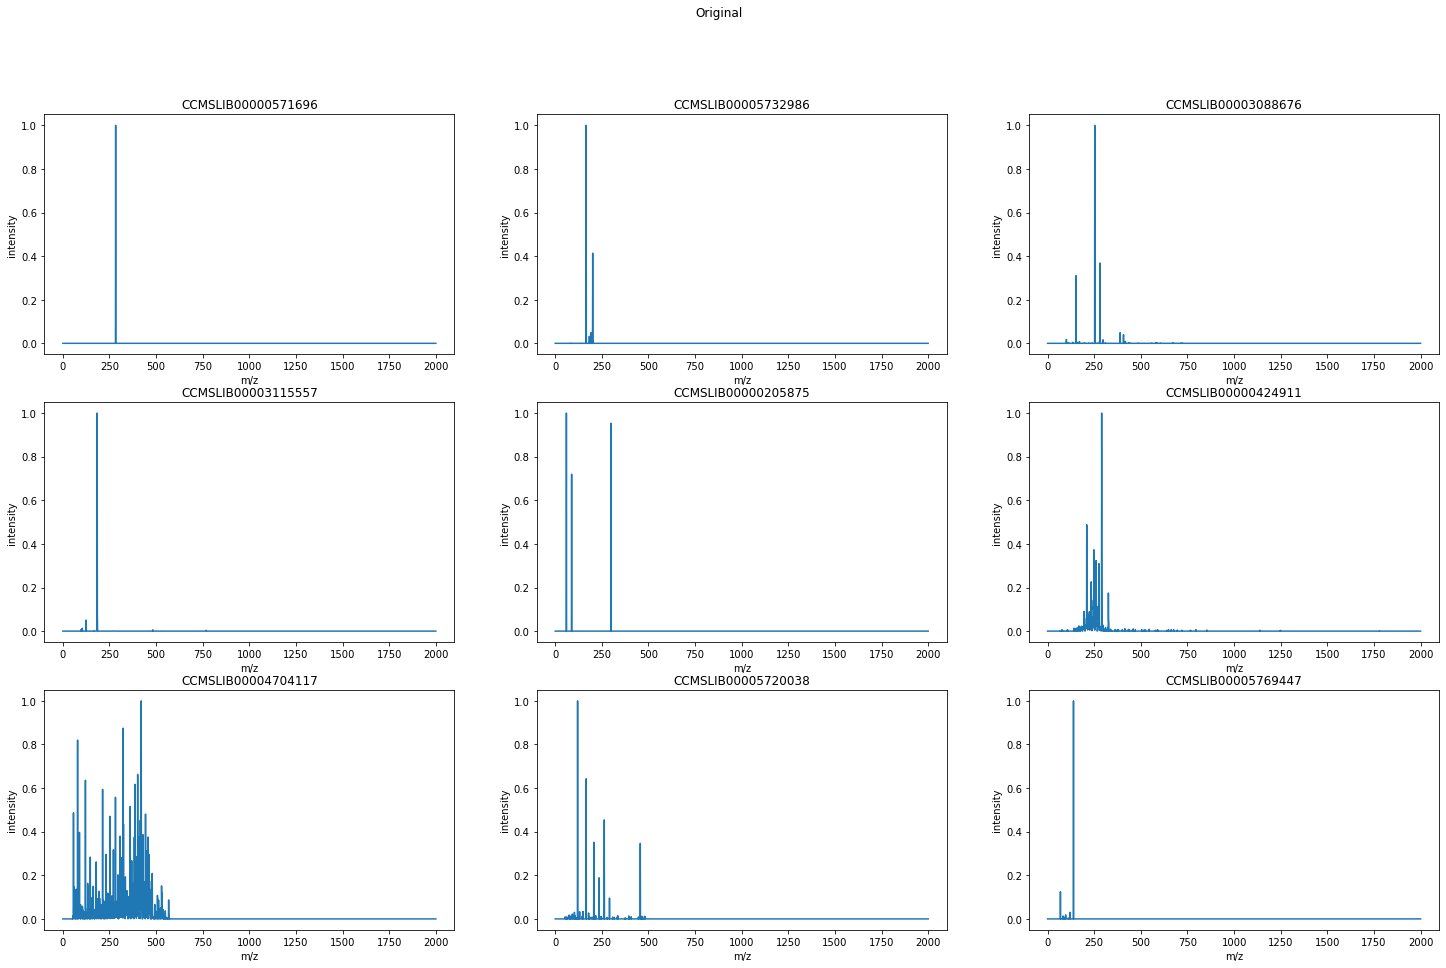

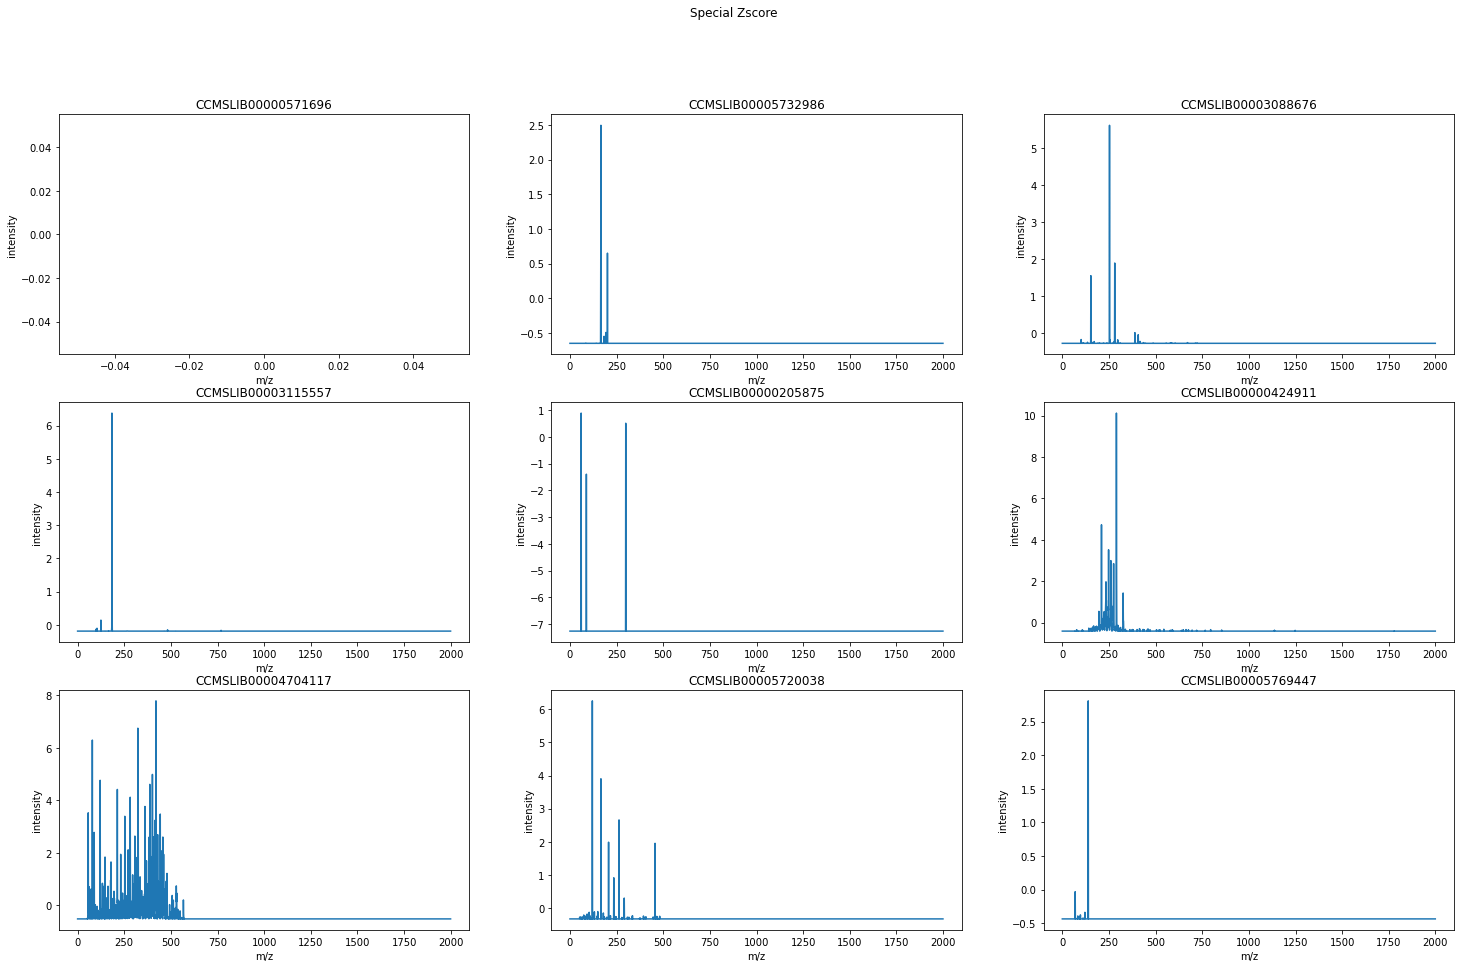

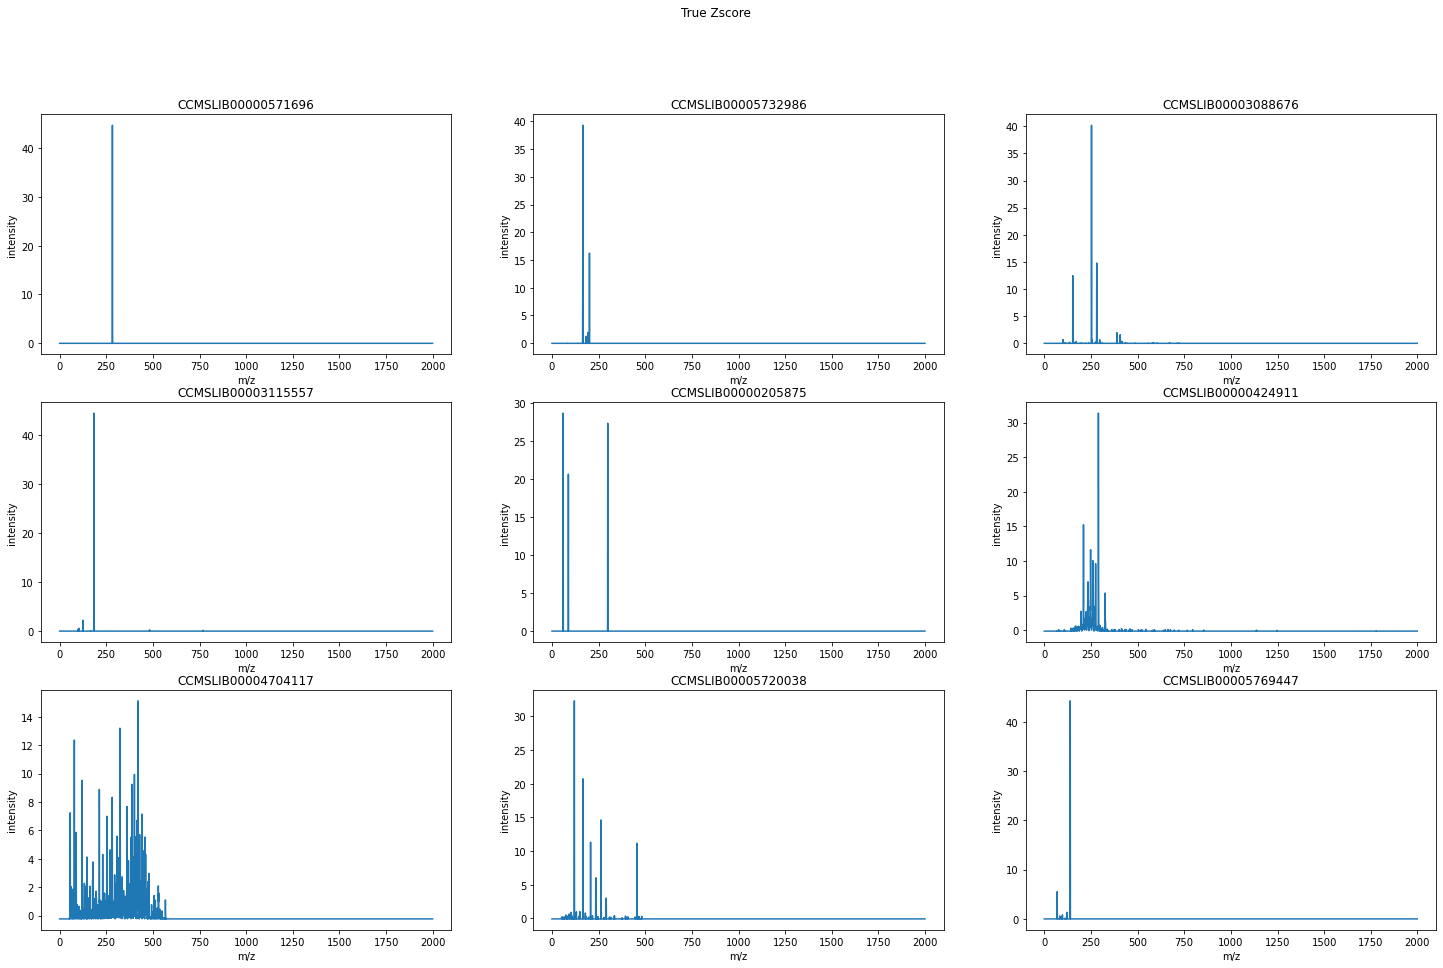

In [47]:
plot(spectra, "Original")
plot(spectra_zscore, "Special Zscore")
plot(spectra_true_zscore, "True Zscore")